In [168]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline
sns.set()

###  Planteamos un problema para entender qué hace que las compras tengan más o menos puntaje de review por parte de los clientes. Y que sea una manera de querer tener en cuenta a los productos mejores rankeados para considerar cambios en el costo de envío o recomendación

In [169]:
customers=pd.read_csv("../Proyecto4/customers.csv")
geo=pd.read_csv("../Proyecto4/geolocation.csv")
items=pd.read_csv("../Proyecto4/items.csv")
payments=pd.read_csv("../Proyecto4/payments.csv")
reviews=pd.read_csv("../Proyecto4/reviews.csv")
products=pd.read_csv("../Proyecto4/products.csv")
sellers=pd.read_csv("../Proyecto4/sellers.csv")
orders=pd.read_csv("../Proyecto4/orders.csv")

In [170]:
geo.shape

(1000163, 5)

In [171]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [172]:
items.shape

(112650, 7)

In [173]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [174]:
payments.shape

(103886, 5)

In [175]:
payments.head() 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [176]:
reviews.size

700000

In [177]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [178]:
products.size

296559

In [179]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [180]:
sellers.size

12380

In [181]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [182]:
orders.size

795528

In [183]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [184]:
payments_orders=pd.merge(payments, orders, how='inner', on=['order_id']) #join de payments y orders en order_id
payments_orders.size

1246632

In [185]:
payments_orders.isnull().sum() *100/ len(payments_orders)

order_id                         0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.168454
order_delivered_carrier_date     1.817377
order_delivered_customer_date    3.014843
order_estimated_delivery_date    0.000000
dtype: float64

In [186]:
products_items=pd.merge(products, items, how="right", on=["product_id"])

In [187]:
products_items.isnull().sum() * 100 / len(products_items)

product_id                    0.000000
product_category_name         1.422992
product_name_lenght           1.422992
product_description_lenght    1.422992
product_photos_qty            1.422992
product_weight_g              0.015979
product_length_cm             0.015979
product_height_cm             0.015979
product_width_cm              0.015979
order_id                      0.000000
order_item_id                 0.000000
seller_id                     0.000000
shipping_limit_date           0.000000
price                         0.000000
freight_value                 0.000000
dtype: float64

In [188]:
sellers_items=pd.merge(sellers, items, how="left", on=["seller_id"])

In [189]:
sellers_items.isnull().sum() *100/ len(sellers_items)

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
order_id                  0.0
order_item_id             0.0
product_id                0.0
shipping_limit_date       0.0
price                     0.0
freight_value             0.0
dtype: float64

In [190]:
customers_orders=pd.merge(customers, orders, how="right", on=["customer_id"])

In [191]:
customers_orders.isnull().sum()*100/len(customers_orders)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [192]:
reviews_orders=pd.merge(reviews, orders, how="right", on=["order_id"])

In [193]:
reviews_orders.isnull().sum()*100/len(reviews_orders)

review_id                         0.000
order_id                          0.000
review_score                      0.000
review_comment_title             88.285
review_comment_message           58.247
review_creation_date              0.000
review_answer_timestamp           0.000
customer_id                       0.000
order_status                      0.000
order_purchase_timestamp          0.000
order_approved_at                 0.161
order_delivered_carrier_date      1.793
order_delivered_customer_date     2.987
order_estimated_delivery_date     0.000
dtype: float64

In [194]:
reviews_orders.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [195]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [196]:
orders_items=pd.merge(orders, items, how="left", on=["order_id"])

In [197]:
orders_items.isnull().sum()*100/len(orders_items)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.141944
order_delivered_carrier_date     1.735067
order_delivered_customer_date    2.846815
order_estimated_delivery_date    0.000000
order_item_id                    0.683271
product_id                       0.683271
seller_id                        0.683271
shipping_limit_date              0.683271
price                            0.683271
freight_value                    0.683271
dtype: float64

In [198]:
join=pd.merge(payments_orders, products_items, how="inner", on=["order_id"])

In [199]:
join.isnull().sum()*100/len(join)

order_id                         0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012755
order_delivered_carrier_date     1.058664
order_delivered_customer_date    2.182805
order_estimated_delivery_date    0.000000
product_id                       0.000000
product_category_name            1.443865
product_name_lenght              1.443865
product_description_lenght       1.443865
product_photos_qty               1.443865
product_weight_g                 0.017007
product_length_cm                0.017007
product_height_cm                0.017007
product_width_cm                 0.017007
order_item_id                    0.000000
seller_id                        0.000000
shipping_limit_date              0

In [200]:
join2=pd.merge(sellers_items, customers_orders, how="inner", on=["order_id"])
join2.isnull().sum()*100/len(join2)

seller_id                        0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013316
order_delivered_carrier_date     1.059920
order_delivered_customer_date    2.178429
order_estimated_delivery_date    0.000000
dtype: float64

In [201]:
join3=pd.merge(join, join2, how="inner", on=["order_id"])
join3.isnull().sum()*100/len(join3)

order_id                           0.000000
payment_sequential                 0.000000
payment_type                       0.000000
payment_installments               0.000000
payment_value                      0.000000
customer_id_x                      0.000000
order_status_x                     0.000000
order_purchase_timestamp_x         0.000000
order_approved_at_x                0.010386
order_delivered_carrier_date_x     1.173653
order_delivered_customer_date_x    2.114530
order_estimated_delivery_date_x    0.000000
product_id_x                       0.000000
product_category_name              1.391155
product_name_lenght                1.391155
product_description_lenght         1.391155
product_photos_qty                 1.391155
product_weight_g                   0.014663
product_length_cm                  0.014663
product_height_cm                  0.014663
product_width_cm                   0.014663
order_item_id_x                    0.000000
seller_id_x                     

In [202]:
reviews["review_comment_title"].isnull().sum()*100/len(reviews["review_comment_title"])

88.285

In [203]:
join4=pd.merge(reviews_orders, join3, how="right", on=["order_id"])
join4.isnull().sum()*100/len(join4)  #unimos reviews

review_id                           0.000000
order_id                            0.000000
review_score                        0.000000
review_comment_title               87.485969
review_comment_message             54.359130
review_creation_date                0.000000
review_answer_timestamp             0.000000
customer_id                         0.000000
order_status                        0.000000
order_purchase_timestamp            0.000000
order_approved_at                   0.010315
order_delivered_carrier_date        1.173437
order_delivered_customer_date       2.115099
order_estimated_delivery_date       0.000000
payment_sequential                  0.000000
payment_type                        0.000000
payment_installments                0.000000
payment_value                       0.000000
customer_id_x                       0.000000
order_status_x                      0.000000
order_purchase_timestamp_x          0.000000
order_approved_at_x                 0.010315
order_deli

In [204]:
join4.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'product_id_x',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_item_id_x', 'seller_id_x', 'shipping_limit_date_x', 'price_x',
       'freight_value_x', 'seller_id_y', 's

In [205]:
df=pd.merge(orders_items, join4, how="inner", on=["order_id"])
df.isnull().sum()*100/len(df) 

order_id                           0.000000
customer_id_x                      0.000000
order_status_x                     0.000000
order_purchase_timestamp_x         0.000000
order_approved_at_x                0.005594
                                     ...   
order_purchase_timestamp_y         0.000000
order_approved_at_y                0.005594
order_delivered_carrier_date_y     1.284957
order_delivered_customer_date_y    1.896005
order_estimated_delivery_date_y    0.000000
Length: 72, dtype: float64

In [206]:
df.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id_x',
       'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'prod

In [207]:
df.dtypes

order_id                           object
customer_id_x                      object
order_status_x                     object
order_purchase_timestamp_x         object
order_approved_at_x                object
                                    ...  
order_purchase_timestamp_y         object
order_approved_at_y                object
order_delivered_carrier_date_y     object
order_delivered_customer_date_y    object
order_estimated_delivery_date_y    object
Length: 72, dtype: object

In [208]:
df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,payment_sequential,payment_type,payment_installments,payment_value,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,product_id_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,seller_id_y,seller_zip_code_prefix,seller_city,seller_state,order_item_id_y,product_id_y,shipping_limit_date_y,price_y,freight_value_y,customer_id_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d5

In [209]:
#dropeamos la columnas que quedaron duplicadas
df = df.drop(['customer_id_x', 'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x', 'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'seller_id_x', 'seller_id_y', 'order_item_id_x', 'price_x', 'price_y','freight_value_y', 'shipping_limit_date_y', 'order_item_id_y', 'product_id_y', 'price_y',
               'product_id_x', 'freight_value_x', 'shipping_limit_date_x' ], axis=1)
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id_y',
       'order_status_y', 'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id_y', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status_y', 'order_purchase_timestamp_y', 'order_

In [210]:
#Renombrar columnas
df.rename(columns={'freight_value':'costo_envio', 'customer_id_y':'customer_id', 'order_status_y':'order_status',
       'order_purchase_timestamp_y':'order_purchase_timestamp', 'order_approved_at_y':'order_approved_at', 'order_delivered_carrier_date_y':'order_delivered_carrier_date', 'order_delivered_customer_date_y':'order_delivered_customer_date', 'order_estimated_delivery_date_y':'order_estimated_delivery_date',
       'payment_installments':'cuotas'}, inplace=True)
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'costo_envio', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivere

In [211]:
df = df.loc[:,~df.columns.duplicated()] #sacamos las columnas duplicadas con el mismo nombre
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'costo_envio', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'cuotas', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [212]:
geo = geo.drop(['geolocation_city', 'geolocation_state'], axis=1)
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='last')
geo.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geo_seller = geo.rename(columns={'zip_code_prefix': 'seller_zip_code_prefix','geolocation_lat':'geo_lat_seller', 'geolocation_lng':'geo_lng_seller'})
geo_customer = geo.rename(columns={'zip_code_prefix': 'customer_zip_code_prefix', 'geolocation_lat':'geo_lat_customer', 'geolocation_lng':'geo_lng_customer'})
df = df.merge(geo_customer, on='customer_zip_code_prefix')
df = df.merge(geo_seller, on='seller_zip_code_prefix')

In [213]:
pd.set_option('display.max_columns', 500)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374066 entries, 0 to 374065
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       374066 non-null  object 
 1   order_item_id                  374066 non-null  float64
 2   product_id                     374066 non-null  object 
 3   seller_id                      374066 non-null  object 
 4   shipping_limit_date            374066 non-null  object 
 5   price                          374066 non-null  float64
 6   costo_envio                    374066 non-null  float64
 7   review_id                      374066 non-null  object 
 8   review_score                   374066 non-null  int64  
 9   review_comment_title           48898 non-null   object 
 10  review_comment_message         188559 non-null  object 
 11  review_creation_date           374066 non-null  object 
 12  review_answer_timestamp       

In [ ]:
#df=pd.read_csv("../Data/df.csv")

In [214]:
df.shape

(374066, 43)

In [215]:
df.shape
df.to_csv('df.csv')

In [216]:
df.isnull().sum()*100/len(df)

order_id                          0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
costo_envio                       0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             86.927975
review_comment_message           49.592051
review_creation_date              0.000000
review_answer_timestamp           0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.005614
order_delivered_carrier_date      1.252987
order_delivered_customer_date     1.864377
order_estimated_delivery_date     0.000000
payment_sequential                0.000000
payment_type                      0.000000
cuotas                            0.000000
payment_val

In [217]:
df.shape

(374066, 43)

In [218]:
df.dtypes

order_id                          object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
costo_envio                      float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
cuotas                             int64
payment_value                    float64
product_category

In [219]:
#crear categorias buena(1), mala(0) para los review scores
df["review_score"].replace(1, 0, inplace=True)
df["review_score"].replace(2, 0, inplace=True)
df["review_score"].replace(3, 0, inplace=True)
df["review_score"].replace(4, 1, inplace=True)
df["review_score"].replace(5, 1, inplace=True)

In [220]:
import matplotlib
matplotlib.__version__

'3.3.0'

In [221]:
df["review_score"].value_counts()

1    216568
0    157498
Name: review_score, dtype: int64

In [222]:
#Dropeamos valores faltantes porque representan alrededor del 1%
df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'product_category_name', 'product_name_lenght','product_description_lenght', 'product_photos_qty',
'order_delivered_customer_date','product_weight_g',
'product_length_cm', 'product_height_cm','product_width_cm' ], inplace=True)
df.isnull().sum()*100/len(df)

order_id                          0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
costo_envio                       0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             86.803337
review_comment_message           49.898159
review_creation_date              0.000000
review_answer_timestamp           0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.000000
order_delivered_carrier_date      0.000000
order_delivered_customer_date     0.000000
order_estimated_delivery_date     0.000000
payment_sequential                0.000000
payment_type                      0.000000
cuotas                            0.000000
payment_val

<AxesSubplot:>

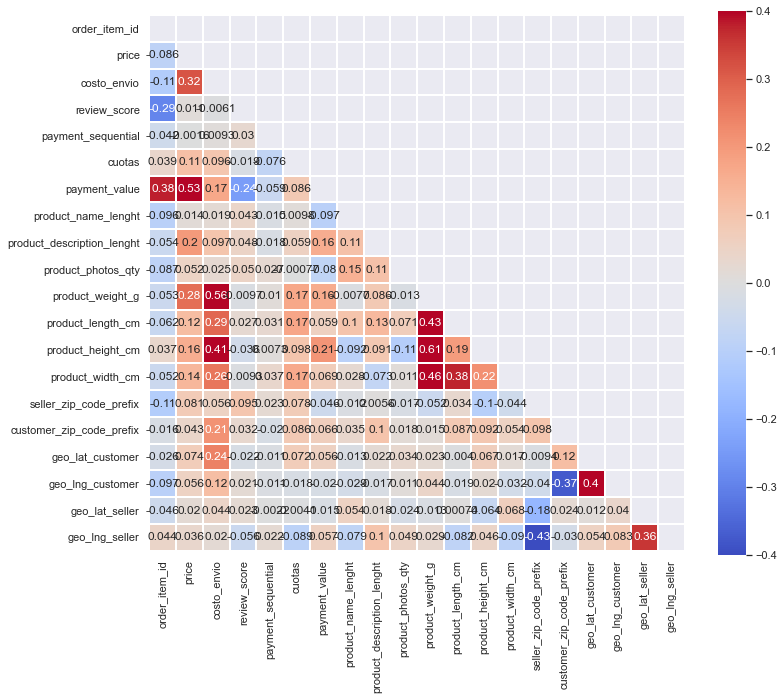

In [223]:
#exploramos la correlación entre variables
import seaborn as sns
plt.figure(figsize=(12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix, vmin=-0.4, vmax=0.4, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True,
           xticklabels=df.corr().columns, yticklabels=df.corr().columns)
#payment_value tiene correlación más fuerte con review score

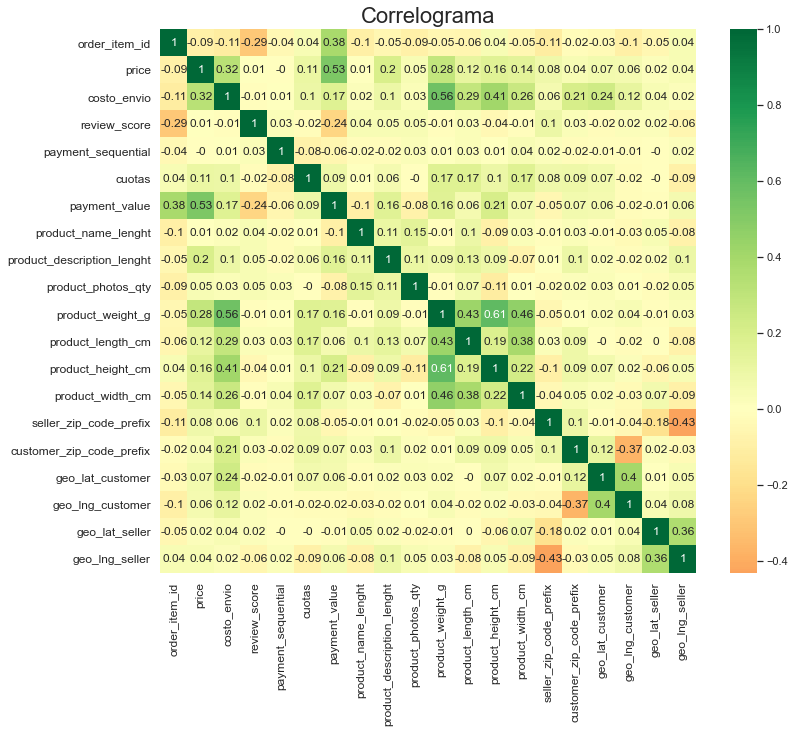

In [224]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [225]:
#dropear columnas que sean ids y las de texto
df = df.drop(['order_id','order_item_id','product_id','seller_id','review_id','customer_id','customer_unique_id', 'seller_zip_code_prefix', 'customer_zip_code_prefix', 'review_answer_timestamp' ], axis=1)
df.columns

Index(['shipping_limit_date', 'price', 'costo_envio', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'cuotas', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'customer_city', 'customer_state',
       'geo_lat_customer', 'geo_lng_customer', 'geo_lat_seller',
       'geo_lng_seller'],
      dtype='object')

In [226]:
df['review_creation_date'].value_counts()

2018-03-06 00:00:00    9319
2017-07-30 00:00:00    9312
2017-09-03 00:00:00    8145
2017-12-14 00:00:00    5202
2018-04-24 00:00:00    3864
                       ... 
2018-07-23 00:00:00       1
2016-12-03 00:00:00       1
2016-11-29 00:00:00       1
2017-05-15 00:00:00       1
2016-10-24 00:00:00       1
Name: review_creation_date, Length: 627, dtype: int64

In [227]:
#Transformar las de fecha de compra, fecha recibido y fecha de cuando se dejo la review a
#numerica (dejar solo mes y dia) y tomarla como categorica en los pipelines
#Primero las pasamos a formato Datetime
from datetime import datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df.dtypes

shipping_limit_date                      object
price                                   float64
costo_envio                             float64
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
cuotas                                    int64
payment_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      

In [228]:
df['review_creation_date'] = df['review_creation_date'].dt.month #quedarnos solo con el mes (va a ser variable categórica)
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.month #quedarnos solo con el mes (va a ser variable categórica)
df['order_estimated_delivery_date'] = df['order_estimated_delivery_date'].dt.date
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].dt.date
#nos quedamos solo con la fecha de creacion de la review y la usamos como categorica

In [229]:
#Crear una columna booleana si la fecha de llegada del item es mayor a la fecha estimada de llegada

df['llego_tarde'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']
df['llego_tarde'] = df['llego_tarde'].replace({True: 1, False: 0})

<AxesSubplot:>

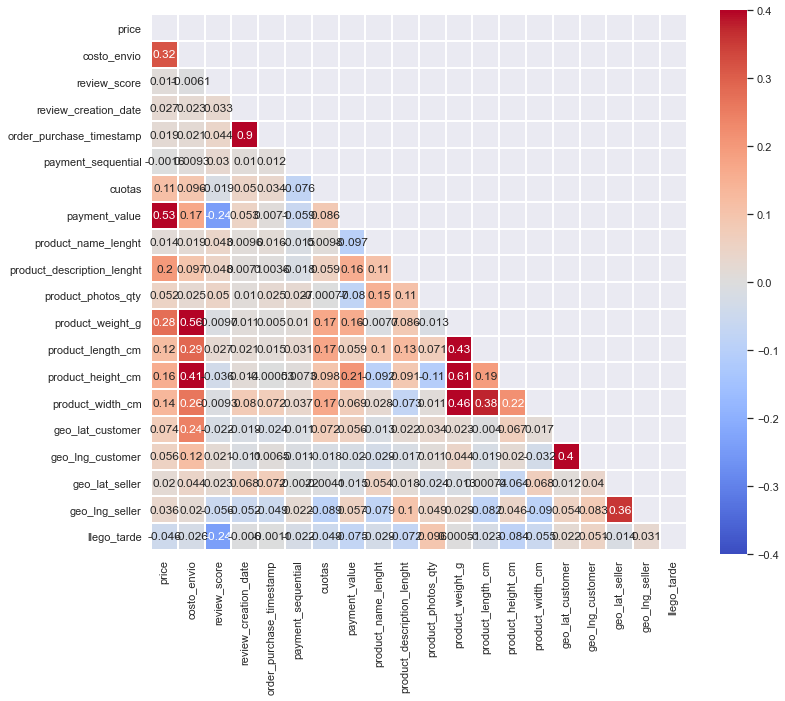

In [230]:
#vemos si tiene peso en review score esta variable nueva 
plt.figure(figsize=(12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix, vmin=-0.4, vmax=0.4, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True,
           xticklabels=df.corr().columns, yticklabels=df.corr().columns)

In [231]:
df["cuotas"].value_counts()

1     165959
10     42138
2      37842
3      30677
4      26604
6      17629
5      16508
8      15970
7       5465
9       1789
24      1090
12       474
15       246
18       200
11        54
20        44
16        31
13        30
21        30
14        21
0          9
17         7
23         1
22         1
Name: cuotas, dtype: int64

In [232]:
df["cuotas"] = df['cuotas'].replace({0: 1}) #a los que dicen 0 cuotas les ponemos 1
df["cuotas"].value_counts(ascending=True) #hay hasta 24 cuotas

22         1
23         1
17         7
14        21
21        30
13        30
16        31
20        44
11        54
18       200
15       246
12       474
24      1090
9       1789
7       5465
8      15970
5      16508
6      17629
4      26604
3      30677
2      37842
10     42138
1     165968
Name: cuotas, dtype: int64

In [233]:
df['cuotas'] = df['cuotas'].replace({2: 6, 3: 6, 4: 6, 5: 6, 6: 6,
                                     7: 12, 8:12, 9:12, 10:12, 11:12, 12:12,
                                     13:18, 14:18, 15: 18, 16:18, 17: 18, 18:18,
                                     19:24, 20:24, 21:24, 22:24, 23:24, 24:24})
#1 cuota = 1
#de 2 a 6 cuotas = 6
#de 7 a 12 cuotas = 12
#de 13 a 18 cuotas = 18
# de 19 a 24 cuotas = 24 (cuotas va a ser variable categórica)

In [234]:
df["cuotas"].value_counts(ascending=True)

18       535
24      1166
12     65890
6     129260
1     165968
Name: cuotas, dtype: int64

In [235]:
df['review_comment_title'] = df.review_comment_title.notnull().astype(int)
df['review_comment_message'] = df.review_comment_message.notnull().astype(int)

In [236]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))
df['distancia'] = haversine(df.geo_lat_customer, df.geo_lng_customer,
                 df.geo_lat_seller, df.geo_lng_seller)
#creamos una columna con las distancias entre seller y customers

In [237]:
df['distancia']=df['distancia'].apply(lambda x:round(x,2))

In [238]:
df.dtypes

shipping_limit_date               object
price                            float64
costo_envio                      float64
review_score                       int64
review_comment_title               int32
review_comment_message             int32
review_creation_date               int64
order_status                      object
order_purchase_timestamp           int64
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
cuotas                             int64
payment_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm

In [239]:
df.head()

,shipping_limit_date,price,costo_envio,review_score,review_comment_title,review_comment_message,review_creation_date,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,cuotas,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_city,customer_state,geo_lat_customer,geo_lng_customer,geo_lat_seller,geo_lng_seller,llego_tarde,distancia
0,2017-10-06 11:07:15,29.99,8.72,1,0,1,10,delivered,10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,1,credit_card,1,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,17.87
1,2017-10-06 11:07:15,29.99,8.72,1,0,1,10,delivered,10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,3,voucher,1,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,17.87
2,2017-10-06 11:07:15,29.99,8.72,1,0,1,10,delivered,10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,2,voucher,1,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,sao paulo,SP,-23.583452,-46.586284,-23.675542,-46.442547,0,17.87
3,2017-08-11 12:34:15,44.99,15.10,1,0,1,8,delivered,8,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17,2017-08-29,1,credit_card,6,60.09,cool_stuff,58.0,537.0,2.0,1850.0,34.0,5.0,34.0,maua,SP,ouro preto,MG,-20.385441,-43.504437,-23.675542,-46.442547,0,474.89
4,2017-09-13 10:05:16,48.90,11.73,1,0,1,9,delivered,9,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16,2017-09-19,1,credit_card,6,60.63,cool_stuff,53.0,537.0,2.0,1800.0,34.0,5.0,34.0,maua,SP,hortolandia,SP,-22.884227,-47.205724,-23.675542,-46.442547,0,117.55


In [240]:
df = df.sample(frac=0.5, random_state=42)

In [241]:
X=df.drop(columns=['review_score'])
y=df['review_score']

# Dividimos los datos en set de train, validación y test: 

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
display(x_train.shape, x_val.shape, x_test.shape,  y_test.shape, y_val.shape, y_train.shape)

(136057, 34)

(27211, 34)

(18142, 34)

(18142,)

(27211,)

(136057,)

In [242]:
y_train.value_counts() #estan lo suficientemente equilibrados

1    80390
0    55667
Name: review_score, dtype: int64

In [243]:
import time 
a=time.time()
y_train.mean(), y_test.mean()
b=time.time()
print(b-a)

0.0020046234130859375


In [244]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]
df.dtypes

shipping_limit_date               object
price                            float64
costo_envio                      float64
review_score                       int64
review_comment_title               int32
review_comment_message             int32
review_creation_date               int64
order_status                      object
order_purchase_timestamp           int64
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
cuotas                             int64
payment_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm

In [245]:
#seleccionamos features numericas
selector_numericas=FeatureSelection(selected_features=['price', 'costo_envio', 'payment_sequential', 'payment_value', 'product_name_lenght', 'product_description_lenght', 'product_weight_g',
                                                       'product_length_cm','product_height_cm','product_width_cm', 'distancia' ]) 
#seleccionamos features categoricas
selector_categoricas=FeatureSelection(selected_features=['product_photos_qty','order_status', 'payment_type', 'product_category_name', 'seller_city','seller_state', 'customer_city', 'customer_state','order_purchase_timestamp','review_creation_date', 'llego_tarde','cuotas','review_comment_title','review_comment_message'])

In [246]:
pasos_numericas = [('selector',selector_numericas), ('scaler', StandardScaler())]
pasos_categoricas = [('selector',selector_categoricas), ('encoder', OneHotEncoder(handle_unknown = "ignore"))]
pipe_num=Pipeline(pasos_numericas)
pipe_cat = Pipeline(pasos_categoricas)

In [247]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
pasos = [ ('feature_engineering',FeatureUnion([ ('num', pipe_num), ('cat', pipe_cat) ]) ),
         ('clasificador', None)]
pipe=Pipeline(pasos)

##  Regresión Logística

In [248]:
#Regresion logística
param_grid_logistic= [
    {'clasificador__penalty': ['l1', 'l2'], 'clasificador__C': np.arange(0.01,10, 0.02),
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador__class_weight':['balanced', None ],
     'clasificador': [LogisticRegression(solver= 'liblinear', max_iter=3500)]}
]
logistic=RandomizedSearchCV(pipe, param_grid_logistic, n_jobs=-1, cv=folds, scoring='accuracy')

In [249]:
logistic.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [250]:
logistic.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [251]:
logistic.best_score_

0.8465569804383601

In [252]:
y_pred_logistic = logistic.predict(x_val)
confusion_logistic = confusion_matrix(y_val, y_pred_logistic)
confusion_logistic 

array([[ 8911,  2376],
       [ 1748, 14176]], dtype=int64)

In [253]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     11287
           1       0.86      0.89      0.87     15924

    accuracy                           0.85     27211
   macro avg       0.85      0.84      0.84     27211
weighted avg       0.85      0.85      0.85     27211



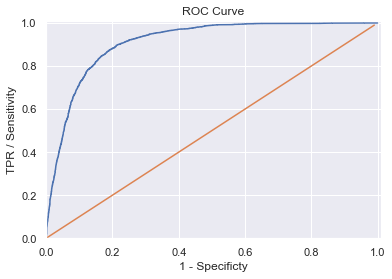

In [254]:
# ROC Curve y AUC
y_pred_logistic_proba = logistic.predict_proba(x_val)

from sklearn.metrics import roc_curve
fpr_lg,tpr_lg,thr_lg = roc_curve(y_val, y_pred_logistic_proba[:,1])

df_lg = pd.DataFrame(dict(fpr=fpr_lg, tpr=tpr_lg, thr = thr_lg))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

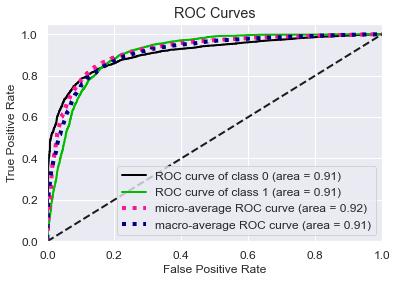

In [255]:
from scikitplot.metrics import plot_roc
plot_roc(y_val,y_pred_logistic_proba)

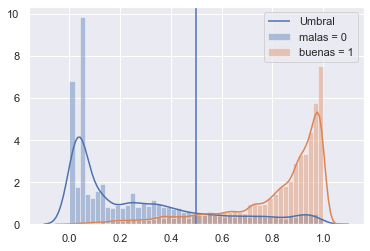

In [256]:
sns.distplot(logistic.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(logistic.predict_proba(x_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas = 1']);

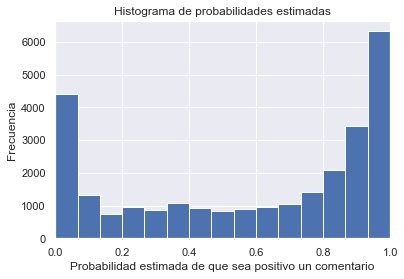

In [257]:
y_pred_proba = logistic.predict_proba(x_val)
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que sea positivo un comentario')
plt.ylabel('Frecuencia')
plt.show()

In [258]:
from sklearn.preprocessing import binarize #probamos cambiar el umbral para tener menos falsos positivos
y_pred_logistic_new = binarize(y_pred_proba, 0.55)[:,1]
y_pred_logistic_new = (y_probs_logit_left > 0.55).astype(int)
y_pred_logistic_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 1, 0, ..., 1, 0, 0])

In [259]:
print('Matriz con umbral 0.5')
display(confusion_matrix(y_val,y_pred_logistic))
print('')
print('Matriz con umbral 0.55')
display(confusion_matrix(y_val,y_pred_logistic_new))  #funciona mejor con el umbral en 0.55

Matriz con umbral 0.5


array([[ 8911,  2376],
       [ 1748, 14176]], dtype=int64)


Matriz con umbral 0.55


array([[ 9200,  2087],
       [ 2117, 13807]], dtype=int64)

##   AdaBoost

In [260]:
#Probamos AdaBoost y GradientBoosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [261]:
dt = DecisionTreeClassifier(random_state=42)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=42)

#AdaBoost
param_grid_ada= [
    {'clasificador__learning_rate': np.arange(0.6, 1, 0.02), 'clasificador__n_estimators': np.arange(50,100, 2),
     "clasificador__base_estimator__max_depth": [1, 2, 3, 5],
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [AdaBoostClassifier(base_estimator=dt, n_estimators=np.arange(50, 500, 2),random_state=42)]}
]
abc=RandomizedSearchCV(pipe, param_grid_ada, cv=folds, n_jobs=-1, scoring='accuracy')

In [262]:
abc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [263]:
abc.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [264]:
abc.best_score_

0.8957716147220707

In [265]:
y_pred_abc = abc.predict(x_val)
confusion_abc = confusion_matrix(y_val, y_pred_abc)
confusion_abc

array([[ 9459,  1828],
       [  937, 14987]], dtype=int64)

In [266]:
print('Accuracy=', accuracy_score(y_val, y_pred_abc))

Accuracy= 0.8983866818566021


In [267]:
print(classification_report(y_val, y_pred_abc))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11287
           1       0.89      0.94      0.92     15924

    accuracy                           0.90     27211
   macro avg       0.90      0.89      0.89     27211
weighted avg       0.90      0.90      0.90     27211



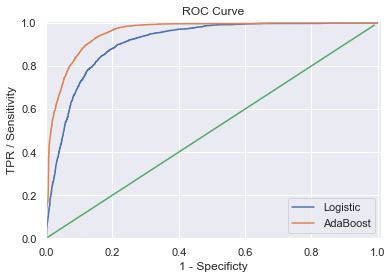

In [268]:
y_pred_abc_proba = abc.predict_proba(x_val)

fpr_abc,tpr_abc,thr_abc = roc_curve(y_val, y_pred_abc_proba[:,1])

df_abc = pd.DataFrame(dict(fpr=fpr_abc, tpr=tpr_abc, thr = thr_abc))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.legend(['Logistic','AdaBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

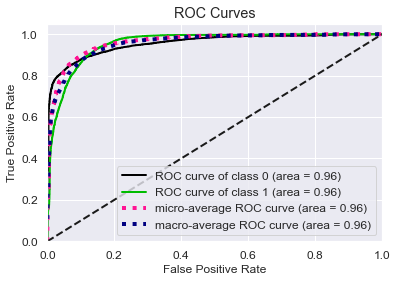

In [269]:
plot_roc(y_val,y_pred_abc_proba);

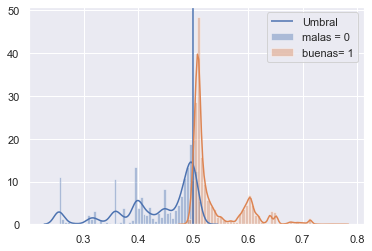

In [270]:
sns.distplot(abc.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(abc.predict_proba(x_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas= 1']);

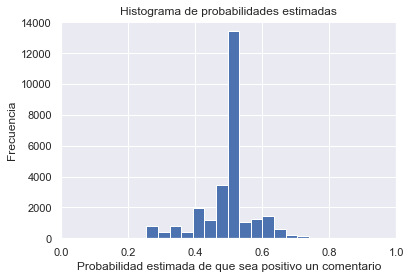

In [271]:
y_pred_proba_ada = abc.predict_proba(x_val)
y_probs_logit_left_ada = y_pred_proba_ada[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left_ada, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que sea positivo un comentario')
plt.ylabel('Frecuencia')
plt.show()

In [272]:
y_pred_ada_new = binarize(y_pred_proba_ada, 0.55)[:,1]
y_pred_ada_new = (y_probs_logit_left_ada > 0.55).astype(int) 
y_pred_ada_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

In [273]:
print('Matriz con umbral 0.5')
display(confusion_matrix(y_val,y_pred_abc))
print('Matriz con umbral 0.55')
display(confusion_matrix(y_val,y_pred_ada_new)) #la dejamos en 0.5

Matriz con umbral 0.5


array([[ 9459,  1828],
       [  937, 14987]], dtype=int64)

Matriz con umbral 0.55


array([[11210,    77],
       [12073,  3851]], dtype=int64)

##  GradientBoost

In [274]:
#GradientBoost
params_gb = [
    {'clasificador__learning_rate': np.arange(0.01, 1, 0.02), 'clasificador__n_estimators': np.arange(50,100, 2),
     "clasificador__max_depth": [1, 2, 3, 5], 'clasificador__loss': ['deviance', 'exponential'], 
     'clasificador__max_features': ['auto', 'sqrt', 'log2'],
     'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
     'clasificador': [GradientBoostingClassifier()]}
]

gb = RandomizedSearchCV(pipe, params_gb, cv=folds, n_jobs=-1, scoring='accuracy')

In [275]:
gb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [276]:
gb.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [277]:
gb.best_score_

0.8550019538243804

In [278]:
y_pred_gb = gb.predict(x_val)
confusion_gb = confusion_matrix(y_val, y_pred_gb)
confusion_gb

array([[ 8661,  2626],
       [ 1358, 14566]], dtype=int64)

In [279]:
print('Accuracy=', accuracy_score(y_val, y_pred_gb))

Accuracy= 0.8535886222483554


In [280]:
print(classification_report(y_val, y_pred_gb))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     11287
           1       0.85      0.91      0.88     15924

    accuracy                           0.85     27211
   macro avg       0.86      0.84      0.85     27211
weighted avg       0.85      0.85      0.85     27211



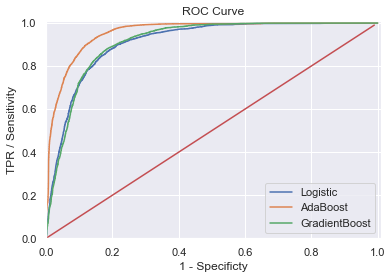

In [281]:
y_pred_gb_proba = gb.predict_proba(x_val)

fpr_gb,tpr_gb,thr_gb = roc_curve(y_val, y_pred_gb_proba[:,1])

df_gb = pd.DataFrame(dict(fpr=fpr_gb, tpr=tpr_gb, thr = thr_gb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

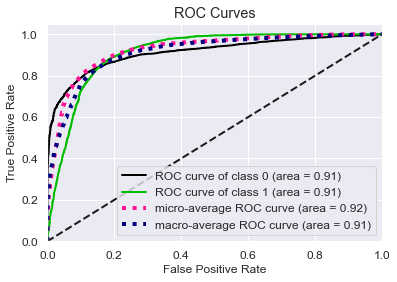

In [282]:
plot_roc(y_val,y_pred_gb_proba)

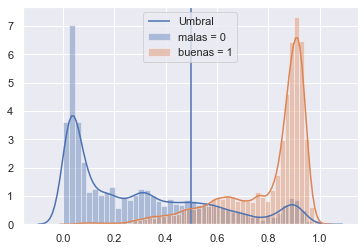

In [283]:
sns.distplot(gb.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(gb.predict_proba(x_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas = 1']);

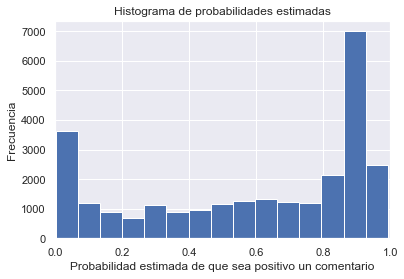

In [284]:
y_pred_proba_gb = gb.predict_proba(x_val)
y_probs_logit_left_gb = y_pred_proba_gb[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left_gb, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que sea positivo un comentario')
plt.ylabel('Frecuencia')
plt.show()

In [285]:
y_pred_gb_new = binarize(y_pred_proba_gb, 0.55)[:,1] 
y_pred_gb_new = (y_probs_logit_left_gb > 0.55).astype(int)
y_pred_gb_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 1, 0, ..., 1, 0, 0])

In [286]:
print('Matriz con umbral 0.5')
display(confusion_matrix(y_val,y_pred_gb))

print('Matriz con umbral 0.55')
display(confusion_matrix(y_val,y_pred_gb_new))

Matriz con umbral 0.5


array([[ 8661,  2626],
       [ 1358, 14566]], dtype=int64)

Matriz con umbral 0.55


array([[ 9086,  2201],
       [ 1780, 14144]], dtype=int64)

##  XGBClassifier

In [287]:
from xgboost.sklearn import XGBClassifier

In [288]:
#XGBClassifier
from xgboost.sklearn import XGBClassifier

xgb_params = {  
    "clasificador__n_estimators": np.arange(50,100, 2),
    "clasificador__max_depth": [1,2,3,4], 
    'feature_engineering__num__scaler': [MinMaxScaler(), StandardScaler()],
    'clasificador__learning_rate': np.arange(0.01, 1, 0.02),
    'clasificador': [XGBClassifier()]
}
xgb = RandomizedSearchCV(pipe, xgb_params, cv=folds, n_jobs=-1, scoring="accuracy")

In [289]:
xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [290]:
xgb.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [291]:
xgb.best_score_

0.8611832027359775

In [292]:
y_pred_xgb = xgb.predict(x_val)
confusion_xgb = confusion_matrix(y_val, y_pred_xgb)
confusion_xgb

array([[ 8635,  2652],
       [ 1152, 14772]], dtype=int64)

In [293]:
print('Accuracy=', accuracy_score(y_val, y_pred_xgb))

Accuracy= 0.8602035941347249


In [294]:
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82     11287
           1       0.85      0.93      0.89     15924

    accuracy                           0.86     27211
   macro avg       0.87      0.85      0.85     27211
weighted avg       0.86      0.86      0.86     27211



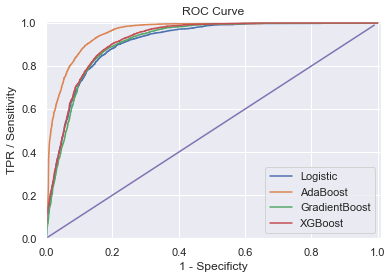

In [295]:
y_pred_xgb_proba = xgb.predict_proba(x_val)

fpr_xgb,tpr_xgb,thr_xgb = roc_curve(y_val, y_pred_xgb_proba[:,1])

df_xgb = pd.DataFrame(dict(fpr=fpr_xgb, tpr=tpr_xgb, thr = thr_xgb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.plot(df_xgb['fpr'],df_xgb['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost', 'XGBoost'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

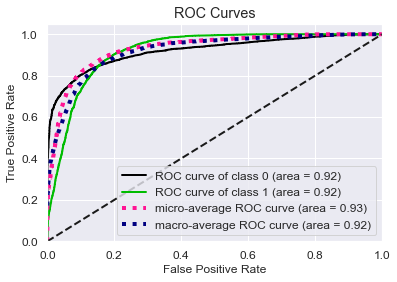

In [296]:
plot_roc(y_val,y_pred_xgb_proba);

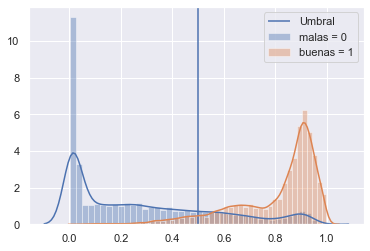

In [297]:
sns.distplot(xgb.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(xgb.predict_proba(x_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas = 1']);

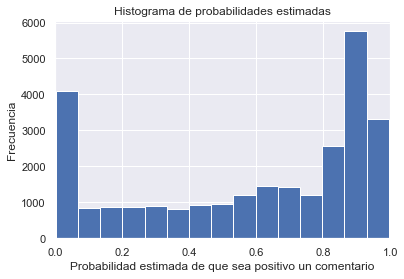

In [312]:
y_pred_proba_xgb = xgb.predict_proba(x_val)
y_probs_logit_xgb = y_pred_proba_xgb[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_xgb, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que sea positivo un comentario')
plt.ylabel('Frecuencia')
plt.show()

In [313]:
y_pred_xgb_new = binarize(y_pred_xgb_proba, 0.55)[:,1] 
y_pred_xgb_new = (y_probs_logit_xgb > 0.55).astype(int)
y_pred_xgb_new

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.55 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0, 1, 0, ..., 1, 0, 1])

In [314]:
print('Matriz con umbral 0.5')
display(confusion_matrix(y_val,y_pred_xgb))

print('Matriz con umbral 0.55')
display(confusion_matrix(y_val,y_pred_xgb_new))

Matriz con umbral 0.5


array([[ 8635,  2652],
       [ 1152, 14772]], dtype=int64)

Matriz con umbral 0.55


array([[ 9014,  2273],
       [ 1523, 14401]], dtype=int64)

##  LightGBM

In [298]:
import lightgbm as lgb
lgb_params = {  
    "clasificador__n_estimators": np.arange(50,100, 2),
    "clasificador__max_depth": [1,2,3,4], 
    "clasificador__learning_rate": [0.01, 0.1],
    "feature_engineering__num__scaler": [MinMaxScaler(), StandardScaler()],
    'clasificador__learning_rate': np.arange(0.01, 1, 0.02),
    'clasificador': [lgb.LGBMClassifier()]
}
lgb = RandomizedSearchCV(pipe, lgb_params, cv=folds, n_jobs=-1, scoring="accuracy")

In [299]:
lgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              FeatureUnion(transformer_list=[('num',
                                                                              Pipeline(steps=[('selector',
                                                                                               FeatureSelection(selected_features=['price',
                                                                                                                                   'costo_envio',
                                                                                                                                   'payment_sequential',
                                                                                                                                   'payment_value',
                                                                      

In [300]:
lgb.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelection(selected_features=['price',
                                                                                                      'costo_envio',
                                                                                                      'payment_sequential',
                                                                                                      'payment_value',
                                                                                                      'product_name_lenght',
                                                                                                      'product_description_lenght',
                                                                                                  

In [301]:
lgb.best_score_

0.8753095960962041

In [302]:
y_pred_lgb = lgb.predict(x_val)
confusion_lgb = confusion_matrix(y_val, y_pred_lgb)
confusion_lgb

array([[ 9070,  2217],
       [ 1239, 14685]], dtype=int64)

In [303]:
print('Accuracy=', accuracy_score(y_val, y_pred_lgb))

Accuracy= 0.8729925397817059


In [304]:
print(classification_report(y_val, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     11287
           1       0.87      0.92      0.89     15924

    accuracy                           0.87     27211
   macro avg       0.87      0.86      0.87     27211
weighted avg       0.87      0.87      0.87     27211



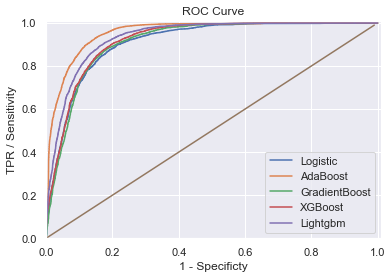

In [305]:
y_pred_lgb_proba = lgb.predict_proba(x_val)

fpr_lgb,tpr_lgb,thr_lgb = roc_curve(y_val, y_pred_lgb_proba[:,1])

df_lgb = pd.DataFrame(dict(fpr=fpr_lgb, tpr=tpr_lgb, thr = thr_lgb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_lg['fpr'],df_lg['tpr'])
plt.plot(df_abc['fpr'],df_abc['tpr'])
plt.plot(df_gb['fpr'],df_gb['tpr'])
plt.plot(df_xgb['fpr'],df_xgb['tpr'])
plt.plot(df_lgb['fpr'],df_lgb['tpr'])
plt.legend(['Logistic','AdaBoost', 'GradientBoost', 'XGBoost', 'Lightgbm'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

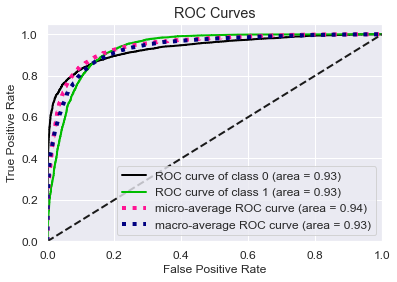

In [306]:
plot_roc(y_val,y_pred_lgb_proba);

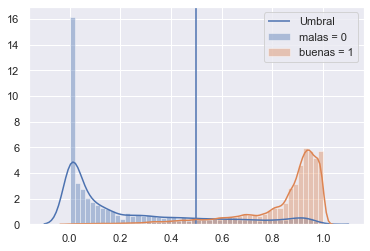

In [307]:
sns.distplot(lgb.predict_proba(x_train[y_train==0])[:,1])
sns.distplot(lgb.predict_proba(x_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'malas = 0', 'buenas = 1']);

## Predecimos con el modelo que mejor funciona

In [315]:
print('Accuracy=', accuracy_score(y_val, y_pred_abc))

Accuracy= 0.8983866818566021


In [316]:
#comparamos el score del mejor modelo (AdaBoost)
y_pred_abc_test =abc.predict(x_test)
print('Accuracy=', accuracy_score(y_test, y_pred_abc_test))

Accuracy= 0.8941131077058758


## Feature Importances

###  Las variables que más pesan para determinar el review score son valor total del pago (incluye envío), precio del item, distancia entre el vendedor y el comprador, costo de envío

In [317]:
union = abc.best_estimator_.steps[0][1]
nums = union.transformer_list[0][1].steps[0][1].selected_features
cats = (union.transformer_list[1][1]
        .steps[-1][1].get_feature_names(
            union.transformer_list[1][1].steps[0][1].selected_features
        ))
columnas = list(nums) + list(cats)
importancias = abc.best_estimator_.steps[-1][1].feature_importances_
pd.DataFrame(zip(columnas, importancias), columns=["columna", "importancia"]).sort_values("importancia", ascending=False)[0:20]

,columna,importancia
3,payment_value,0.119064
0,price,0.074690
10,distancia,0.054164
1,costo_envio,0.041053
5,product_description_lenght,0.035085
4,product_name_lenght,0.026846
8,product_height_cm,0.021521
6,product_weight_g,0.021136
7,product_length_cm,0.015982
3751,review_comment_message_1,0.015957


In [318]:
abc.best_estimator_.steps[-1][1].feature_importances_

array([0.0746902 , 0.04105265, 0.0008998 , ..., 0.00101629, 0.00570837,
       0.01595723])